In [1]:
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pyrepseq'

In [ ]:
# Load Excel file (modify 'sequences.xlsx' and sheet name if needed)
file_path = "/Users/robertomorantovar/Dropbox/Research/Immune_system/primary_response/data/victora_2020/"  # Change this to your actual file
df = pd.read_excel(file_path + 'mmc1.xlsx', sheet_name="Photoactivation CGG", header = 0, skiprows = 1)

In [2]:
df = df[df['Mouse']<=4]
df["CDR3:"] = df["CDR3:"].astype(str).fillna("")
df_cleaned = df[df["CDR3:"]!='...']
df_cleaned = df_cleaned[~df_cleaned["CDR3:"].str.contains("\*", regex=True)]
df_cleaned["Count"] = df_cleaned.groupby("CDR3:")["CDR3:"].transform("count")
# df_cleaned.to_csv(file_path + 'data_all.csv')
df_unique = df_cleaned.drop_duplicates(subset=["CDR3:"], keep="first")
df_unique.to_csv(file_path + 'data_cluster_all.csv')

<>:4: SyntaxWarning: invalid escape sequence '\*'
<>:4: SyntaxWarning: invalid escape sequence '\*'
/var/folders/zb/94w9fjpd0_s_68nft_zfybt80000gp/T/ipykernel_27562/3694500699.py:4: SyntaxWarning: invalid escape sequence '\*'
  df_cleaned = df_cleaned[~df_cleaned["CDR3:"].str.contains("\*", regex=True)]
/var/folders/zb/94w9fjpd0_s_68nft_zfybt80000gp/T/ipykernel_27562/3694500699.py:4: SyntaxWarning: invalid escape sequence '\*'
  df_cleaned = df_cleaned[~df_cleaned["CDR3:"].str.contains("\*", regex=True)]


NameError: name 'df' is not defined

## Default plot

The plot below is performed with default parameters, but the package provides extensive support for customization.

280

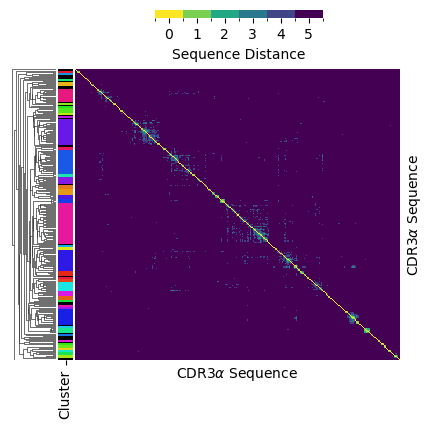

In [32]:
cg, linkage, cluster = rsp.similarity_clustermap(df_unique,
                                                 alpha_column='CDR3:',
                                                 beta_column=None, )
len(cluster)

In [29]:
index_cluster, counts = np.unique(cluster, return_counts=True)

In [6]:
index_cluster[np.argmax(counts)], counts[np.argmax(counts)]

(35, 39)

In [7]:
df_cluster = df_unique.iloc[cluster == 55]

In [8]:
df_cluster.to_csv(file_path + 'data_cluster_55.csv')

In [9]:
df_counts = df_cleaned.groupby(["CDR3:"]).size().reset_index(name="Count")
print(np.sum(df_counts['Count']), np.sum(df_unique['Count']))

413 413


In [10]:
df_energies_55 = pd.read_csv(file_path + 'CDR3_aligned_55_motif_scores.csv')
df_energies_all = pd.read_csv(file_path + 'CDR3_aligned_all_motif_scores.csv')
df_energies_all.columns

Index(['Sequence ID', 'Sequence', 'PWM Score', 'Motif Energy (ΔG)'], dtype='object')

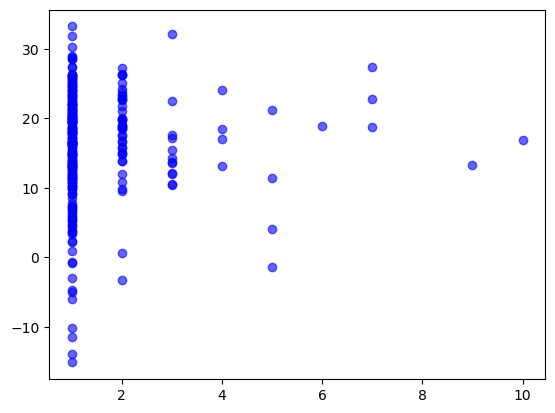

In [30]:
for i, seq in enumerate(df_unique['CDR3:']):
    plt.scatter(df_unique[df_unique['CDR3:']==seq]['Count'], df_energies_all['PWM Score'].iloc[i], color = 'blue', alpha = .6)
#     plt.scatter(df_counts[df_counts['CDR3:']==seq]['Count'], df_energies_all['Motif Energy (ΔG)'].iloc[i], color = 'red', alpha = .6)
    

1


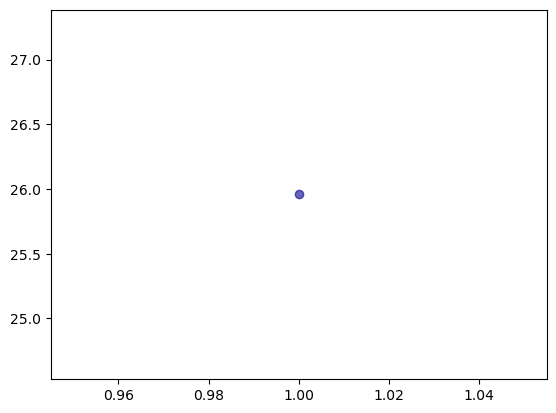

In [12]:
j = 0
for i, seq in enumerate(df_cluster['CDR3:']):
    plt.scatter(df_unique[df_unique['CDR3:']==seq]['Count'], df_energies_55['PWM Score'].iloc[i], color = 'darkblue', alpha = .6)
#     plt.scatter(df_counts[df_counts['CDR3:']==seq]['Count'], df_energies_69['Motif Energy (ΔG)'].iloc[i], color = 'darkred', alpha = .6)
    j+=1
print(j)

In [38]:
# Load Excel file (modify 'sequences.xlsx' and sheet name if needed)
file_path = "/Users/robertomorantovar/Dropbox/Research/Immune_system/primary_response/data/victora_2016/"  # Change this to your actual file
df2016 = pd.read_excel(file_path + 'aad3439-databases1.xlsx', sheet_name="Photoactivation", header = 0, skiprows = 1)


/Users/robertomorantovar/anaconda3/envs/roberto/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


['CGG' 'OVA' 'HA' 'NP-OVA']


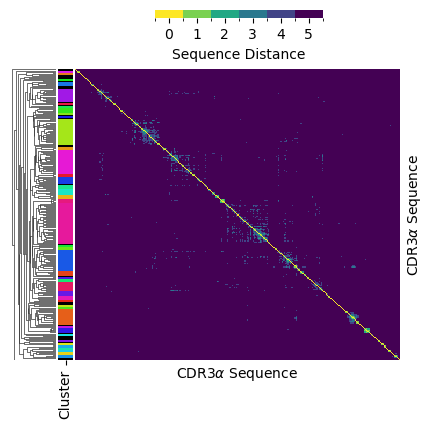

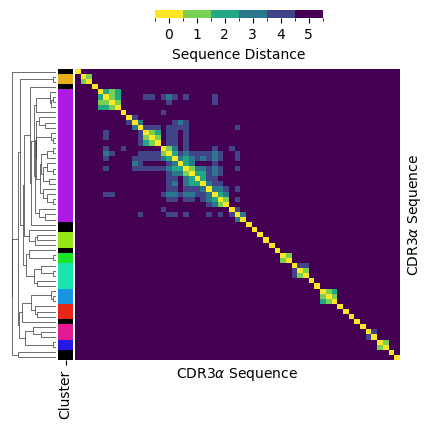

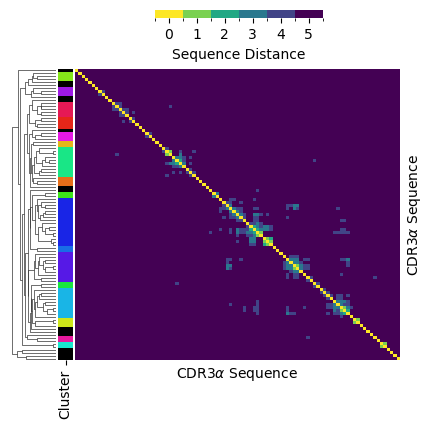

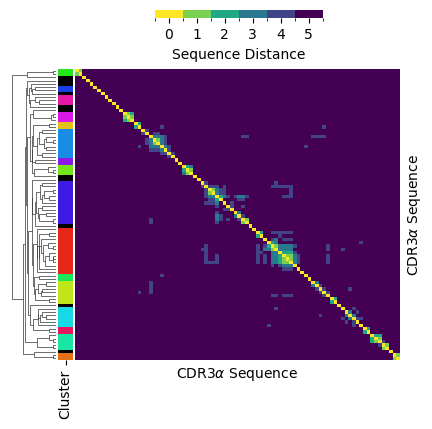

In [39]:
df2016 = df2016[df2016['Figures']=='2/S3']
df2016["CDR3:"] = df2016["CDR3:"].astype(str).fillna("")
df2016_cleaned = df2016[df2016["CDR3:"]!='...']
df2016_cleaned = df2016_cleaned[~df2016_cleaned["CDR3:"].str.contains("\*", regex=True)]
df2016_cleaned["Count"] = df2016_cleaned.groupby("CDR3:")["CDR3:"].transform("count")
df2016_unique = df2016_cleaned.drop_duplicates(subset=["CDR3:"], keep="first")
Antigens = df2016['Antigen'].unique()
print(Antigens)
for antigen in Antigens:
    df2016_unique[df2016_unique['Antigen']==antigen].to_csv(file_path + 'data_cluster_' + antigen + '.csv')
    cg, linkage, cluster = rsp.similarity_clustermap(df2016_unique[df2016_unique['Antigen']==antigen],
                                                 alpha_column='CDR3:',
                                                 beta_column=None, )

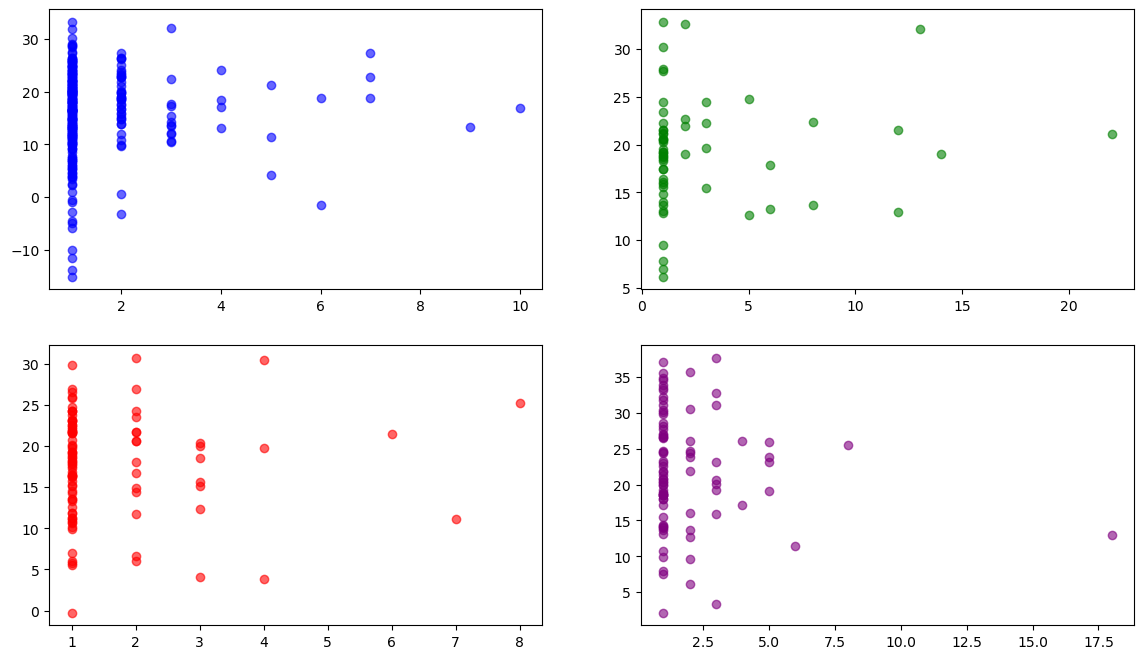

In [40]:
colors = ['blue', 'green', 'red', 'purple']
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
for ag, antigen in enumerate(Antigens):
    df_antigen = df2016_unique[df2016_unique['Antigen']==antigen]
    df_energies_antigen = pd.read_csv(file_path + 'CDR3_aligned_' + antigen + '_motif_scores.csv')
    for i, seq in enumerate(df_antigen['CDR3:']):
        ax[int(ag/2), ag%2].scatter(df_antigen[df_antigen['CDR3:']==seq]['Count'], df_energies_antigen['PWM Score'].iloc[i], color = colors[ag], alpha = .6)
        

# Plotting a sequence-similarity clustermap

This notebook shows how to display patterns of TCR sequence similarity in a hierarchically clustered heatmap.

The example data is from [Dash et al. Nature 2017](https://doi.org/10.1038/nature22383).

In [83]:
!wget https://raw.githubusercontent.com/kmayerb/tcrdist3/master/dash_human.csv -O data/dash_human.csv > /dev/null 2>&1

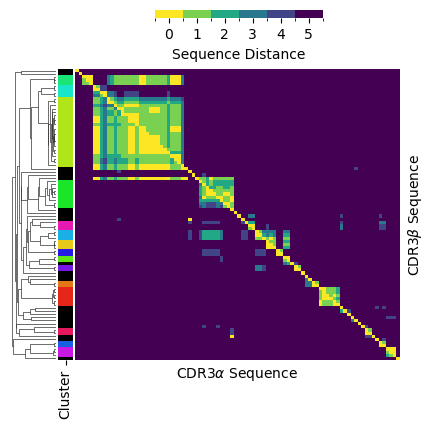

In [84]:
d = pd.read_csv('data/dash_human.csv')
epitope = 'BMLF'
cg, linkage, cluster = rsp.similarity_clustermap(d[d['epitope']==epitope],
                                                 alpha_column='cdr3_a_aa',
                                                 beta_column='cdr3_b_aa')

## Customizations

By default the sequences are not displayed to keep the plot uncluttered. Here we show how to modify the plot to display the sequences, which can be useful particularly in very small samples

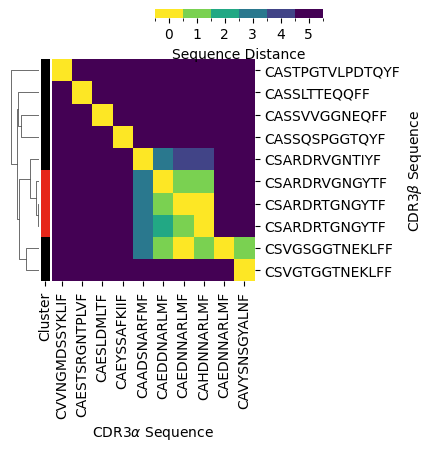

In [22]:
dsample = d[d['epitope']==epitope].sample(10)
cg, linkage, cluster = rsp.similarity_clustermap(dsample,
                                                 alpha_column='cdr3_a_aa',
                                                 beta_column='cdr3_b_aa',
                                                 xticklabels=dsample['cdr3_a_aa'],
                                                 yticklabels=dsample['cdr3_b_aa'])

Plotting metadata columns alongside the sequence similarity clustermap can help identify drivers of sequence clustering. For example, this visualization helps highlight which clusters consist of sequences from across individuals, or whether V and J gene usage is uniform within a cluster.

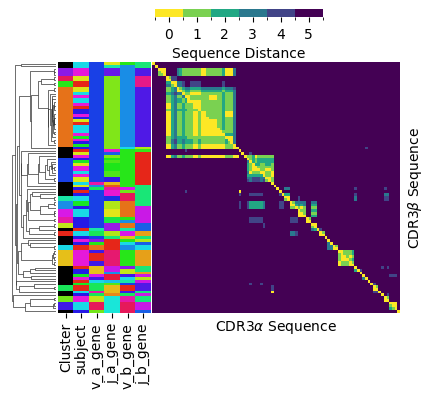

In [8]:
cg, linkage, cluster = rsp.similarity_clustermap(d[d['epitope']==epitope],
                                                 alpha_column='cdr3_a_aa',
                                                 beta_column='cdr3_b_aa',
                                                 meta_columns=['subject',
                                                               'v_a_gene', 'j_a_gene',
                                                               'v_b_gene', 'j_b_gene'],
                                                 figsize=(4.2, 3.9))

Further customization of the metadata column colors and labels:

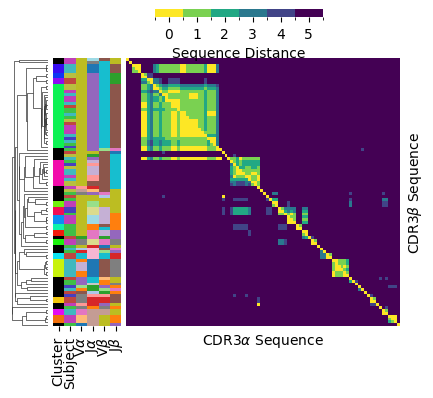

In [9]:
subject_color_mapper = lambda labels, **kwargs: rsp.labels_to_colors_hls(labels,
                                                                         palette_kws=dict(l=0.5, s=0.5),
                                                                         **kwargs)
cluster_color_mapper = lambda labels, **kwargs: rsp.labels_to_colors_hls(labels,
                                                                         palette_kws=dict(l=0.5, s=0.9),
                                                                         **kwargs)
cg, linkage, cluster = rsp.similarity_clustermap(d[d['epitope']==epitope],
                                                 alpha_column='cdr3_a_aa',
                                                 beta_column='cdr3_b_aa',
                                                 meta_columns=dict(subject='Subject',
                                                                   v_a_gene=r'V$\alpha$',
                                                                   j_a_gene=r'J$\alpha$',
                                                                   v_b_gene=r'V$\beta$',
                                                                   j_b_gene=r'J$\beta$'),
                                                 meta_to_colors=[cluster_color_mapper, subject_color_mapper,
                                                                rsp.labels_to_colors_tableau,
                                                                rsp.labels_to_colors_tableau,
                                                                rsp.labels_to_colors_tableau,
                                                                rsp.labels_to_colors_tableau],
                                                colors_ratio=0.03, dendrogram_ratio=0.1,
                                                figsize=(4.2, 3.9))